In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *


In [2]:

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]



In [3]:
from math import sqrt
def add (*vv):
	return [sum([v[0] for v in vv]), sum([v[1] for v in vv])]


def translate(iv, *vv):
	return [add(iv, v) for v in vv]

def length(v):
	return sqrt(v[0] ** 2 + v[1]**2)

def mul(v, x):
	return [v[0] * x, v[1] * x]

def diff(av, bv):
	return [av[0] - bv[0], av[1] - bv[1]]

def distance(av, bv):
	return length(diff(av, bv))



def perimeter(*vv):
	distances = [distance(vv[i], vv[(i + 1) % len(vv)]) for i in range(len(vv))]
	return sum(distances)


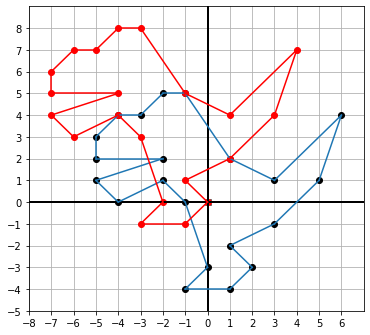

In [4]:
translated_dino = translate([-2, 3], *dino_vectors) 
draw(
    Points(*dino_vectors),
	Polygon(*dino_vectors),

	Points(*translated_dino, color="red"),
	Polygon(*translated_dino, color="red")
)



In [5]:
perimeter(*dino_vectors)

44.77115093694563

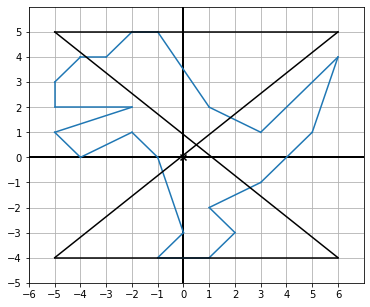

In [6]:
max_x = max([v[0] for v in dino_vectors])
min_x = min(([v[0] for v in dino_vectors]))
max_y = max([v[1] for v in dino_vectors])
min_y = min(([v[1] for v in dino_vectors]))
dino_corners = [(x, y)  for y in (max_y, min_y) for x in (max_x, min_x)]
draw(
	Polygon(*dino_vectors),
	Polygon(*dino_corners, color="black")
)
dino_dims = (max_x - min_x, max_y - min_y)




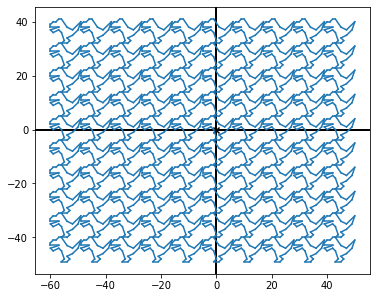

In [7]:

def hundreds_dinos():
	translations = [(x * dino_dims[0], y * dino_dims[1]) for x in range(-5, 5) for y in range(-5, 5)]
	dinos = [translate(t, *dino_vectors) for t in translations]
	draw(*[Polygon(*d) for d in dinos], grid=False)

hundreds_dinos()


1


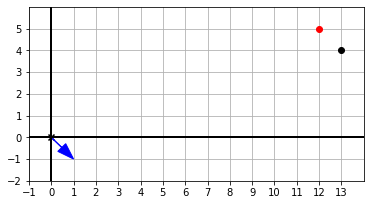

True


In [8]:
from random import uniform
def check(v, v2, d):
	n, m = v2
	if n > m:
		res = sqrt((v[0] - n)**2 + (v[1] - m)**2)

		return  res == d
	return False
v1 = (1, -1)
def uniform_range(a,b, count=100):
	return (uniform(a,b) for i in range(count))

vv = [(n, m) for n in range(14) for m in range(14) if check(v1, (n,m), 13)]
print(len(vv))
diffs =[diff(v, v1) for v in vv]
draw(
	Arrow(v1, color="blue"),
	Points(*vv),
	Points(*diffs, color="red")

)
print(check(v1, (13,4), 13))

In [9]:
from math import atan2, cos, sin, pi
def to_pol(vec):
	angle = atan2(vec[1], vec[0])
	_length = length(vec)
	return (_length, angle)

def to_vec(rad):
	l, angle = rad
	c = cos(angle)
	s = sin(angle)
	x = c * l
	y = s * l
	return (x,y)

def to_rad(grad):
	return grad * pi / 180

def to_grad(rad):
	return rad / pi * 180

In [10]:
to_grad(to_rad(180))
to_rad(116.57)

2.03453030904979

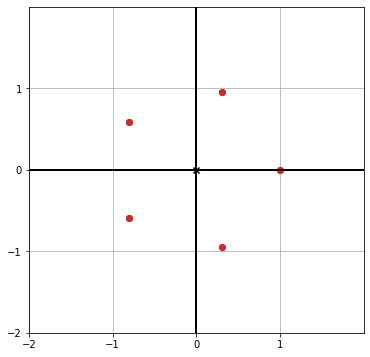

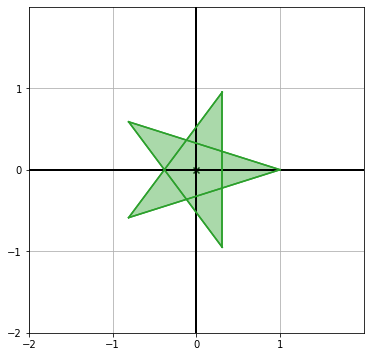

In [43]:
points = [(cos(x*pi/1), pi*x/5) for x in range(10)]
components = [to_vec(p) for p in points]
draw(Points(*components, color=red))
draw(Polygon(*components, color=green, fill=green))



In [56]:
from math import atan, asin, acos, tan
to_grad(atan(3/-2))
length((-2,3))
to_grad(asin(3/3.605))
acos(-2/3.605)

to_vec((sqrt(2), pi*7/4))


(1.0, -1.0000000000000002)

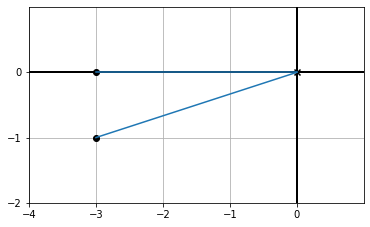

(3.1622776601683795, -2.819842099193151) (3.0, 3.141592653589793)


-180.0

In [76]:
dino_vectors2 = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]


fragment1 = [(-1,-4), (0,-3), (1,-4)]
fragment2 = [(6,4), (5,1), (3,1)]
fragment3 = [(-2,2), (-5,1), (-5,2)]
def get_angle(origin, a, b):
	shift = (-origin[0], -origin[1])
	a,b = translate(shift, a,b)
	draw(Points(a,b), Segment((0,0), a), Segment((0,0),b))
	a,b = [to_pol(x) for x in (a,b)]
	print(a,b)
	return (a[1] - b[1])

get_angle(*fragment3)


from math import degrees, radians
degrees(-pi)